In [1]:
# Importing required libraries.
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest 
print('All imports done.')

All imports done.


In [2]:
# Reading the dataset into pandas dataframe
data = pd.read_csv("C:/Users/HP/Downloads/ML/DataSets/creditcardfraud_ds.csv") 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Get the info related to data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
print(data.shape)
# removing the duplicates from the data
data.drop_duplicates(keep= 'first' , inplace= True)
print(data.shape)

(284807, 31)
(283726, 31)


In [5]:
# checking whether there are any empty cells in data
data.isnull().values.any() 

False

Text(0, 0.5, 'Frequency')

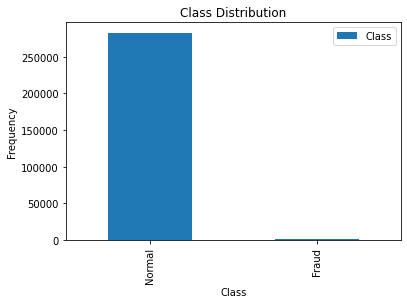

In [6]:
# plotting a bar graph showing normal transactions and fraud transactions.
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar' , legend = True)
plt.xticks(range(2),['Normal','Fraud'])
plt.title('Class Distribution')
plt.xlabel('Class') 
plt.ylabel('Frequency')

In [7]:
# Finding the number of normal transactions and fraud transactions in the dataset.
normal = data[data['Class'] == 0] 
fraud = data[data['Class'] == 1]

print('Number of normal transactions are :' , normal.shape[0])
print('Number of fraud transactions are :' , fraud.shape[0])
print('Total number of transactions are :' , data.shape[0])

Number of normal transactions are : 283253
Number of fraud transactions are : 473
Total number of transactions are : 283726


In [8]:
# Splitting the dataset into X (input) and Y(output) . 
# Input containing data of all columns except column Class.
# Output contains data from column Class , which predicts transaction is fraud or not.
col = data.columns.tolist()
col.remove('Class')

X = data[col]
Y = data['Class']

[X.shape,Y.shape]

[(283726, 30), (283726,)]

In [9]:
# Spitting the given data into 80:20 making training set and test set.
# random_state is set so that we can control shuffing and output can be reproducible 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 4) 
[[ X_train.shape , Y_train.shape ],[ X_test.shape , Y_test.shape ]]

[[(226980, 30), (226980,)], [(56746, 30), (56746,)]]

In [10]:
# Finding outlier fraction of the training set to improve training accuracy. 
train_normal , train_fraud = Y_train.value_counts()
Y_train.value_counts()
outlier_fraction = train_fraud / train_normal 
outlier_fraction 

0.0017167495619861337

In [11]:
# converting the pandas dataframe into a numpy array
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values 

##### Next step is to train the model using train set and test it with the test set. Now , I will process the data with several anomaly detection models. The models will be judged based on Train set accuracy and Test set accuracy.

In [12]:
def confusion_matrix_plot(y,Y):
    plt.figure(figsize=(3.5,3.5))
    data = metrics.confusion_matrix(y,Y)
    labels = ['Normal','Fraud']
    sns.heatmap(data ,annot= True ,fmt= 'd' ,linewidths= .5 ,cmap= 'icefire' ,square= True ,xticklabels = labels ,yticklabels=labels)
    plt.ylabel('Actual transaction');
    plt.xlabel('Predicted transaction');

# Model 1 : Logistic Regression

In [13]:
LR = LogisticRegression(max_iter= 200)
LR.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [14]:
def lr_predict(X,Y):
    y = LR.predict(X)

    print("Accuracy Score :" , accuracy_score(Y,y))
    confusion_matrix_plot(Y,y)

Accuracy Score : 0.9992025729139131


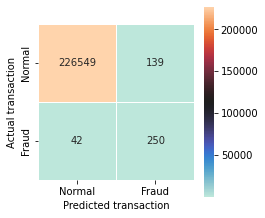

In [15]:
lr_predict(X_train , Y_train) 

Accuracy Score : 0.9991893701758714


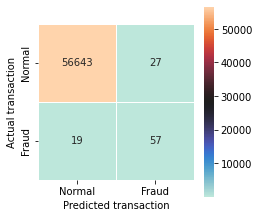

In [16]:
lr_predict(X_test , Y_test)

# Model 2 : Isolation Forest

In [17]:
IsF = IsolationForest( max_samples= len(X_train) , contamination= outlier_fraction ) 
IsF.fit(X_train,Y_train)

IsolationForest(contamination=0.0017167495619861337, max_samples=226980)

In [18]:
def isf_predict(X,Y):
    y = IsF.predict(X)

    y[y == 1] = 0
    y[y == -1] = 1

    print("Accuracy Score :" , accuracy_score(Y,y))
    confusion_matrix_plot(Y,y)

Accuracy Score : 0.9976077187417394


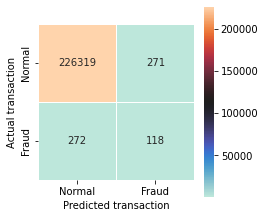

In [19]:
isf_predict(X_train , Y_train)

Accuracy Score : 0.9978148239523491


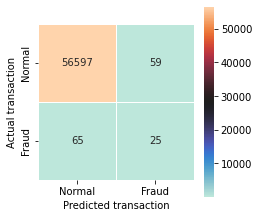

In [20]:
isf_predict(X_test , Y_test)